In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

***Step 2: Data Cleaning and Exploration***

In [2]:
line_df = pd.read_csv('../data/csv/ShakespeareCharacterLines.csv')

In [3]:
line_df.head()

,play,name,line,character_line_number,play_line_number
0,a-midsummer-nights-dream,THESEUS,"Now, fair Hippolyta, our nuptial hour\nDraws o...",1,1
1,a-midsummer-nights-dream,HIPPOLYTA,Four days will quickly steep themselves in nig...,1,2
2,a-midsummer-nights-dream,THESEUS,"Go, Philostrate,\nStir up the Athenian youth t...",2,3
3,a-midsummer-nights-dream,EGEUS,"Happy be Theseus, our renowned duke!\n\n",1,4
4,a-midsummer-nights-dream,THESEUS,"Thanks, good Egeus. What's the news with thee?...",3,5


In [4]:
line_df.shape

(31816, 5)

- Check for improperly processed lines.

In [5]:
line_df['line_length'] = line_df['line']
line_df['line_length'] = line_df['line_length'].map(len)

In [6]:
line_df[line_df['line_length'] <5]

,play,name,line,character_line_number,play_line_number,line_length
1099,alls-well-that-ends-well,PAROLLES,O!\n\n,98,595,4
2210,antony-and-cleopatra,CLEOPATRA,O!\n\n,117,770,4
24930,the-taming-of-the-shrew,PETER,I.\n\n,1,461,4


In [7]:
[name for name in list(line_df['name'].to_dict().values()) if ',' in name]

[]

In [8]:
[name for name in list(line_df['name'].to_dict().values()) if 'and' in name]

[]

In [9]:
[name for name in list(line_df['name'].to_dict().values()) if '\n' in name]

[]

- Remove all preceding commas, spaces, newlines and tabs, all inline newlines and tabs, and all ending newlines, tabs, and spaces.

In [10]:
def fix_tabs_newlines(string):
    #Turn multiple whitespace between two characters to a single whitespace.
    out = re.sub('(?<=\S)\s+(?=\S)', ' ', string)
    #Remove preceding whitespace
    out = re.sub('(?<=\A)\s+', '', out)
    #Remove ending whitespace
    out = re.sub('\s+(?=\Z)', '', out)
    #Remove preceding ',' plus whitespace.
    out = re.sub('\A,\s+(?=\S)', '', out)
    return out

In [11]:
line_df['line'] = line_df['line'].map(fix_tabs_newlines)

- Scrub stage directions from dialogue.

In [12]:
line_df['line'] = line_df['line'].map(lambda x: re.sub('__stage_direction__', '', x))

- Check for lines that are only stage directions, validating against the script.

In [13]:
line_df['line_length'] = line_df['line']
line_df['line_length'] = line_df['line_length'].map(len)

In [14]:
line_df[line_df['line_length'] < 2]

,play,name,line,character_line_number,play_line_number,line_length
19635,pericles,MARINA,,44,546,1


- Drop empty line.

In [15]:
line_df.drop(index = 19635, inplace = True)

- Set multiindex for EDA.

In [16]:
line_df.set_index(["play", "name", "character_line_number"], inplace = True)

- Check distribution of character maximum lines.

In [17]:
colon = slice(None)

In [18]:
line_df['max_line_count'] = 0
line_df['total_character_count'] = 0

In [19]:
for index in line_df.index:
    play  = index[0]
    name = index[1]
    
    character_slice = line_df.loc[(play, name, colon)]
    
    line_df.loc[(play, name, colon), 'max_line_count'] = max(list(character_slice.index))
    line_df.loc[(play, name, colon), 'total_character_count'] = max(list(character_slice['line_length']))

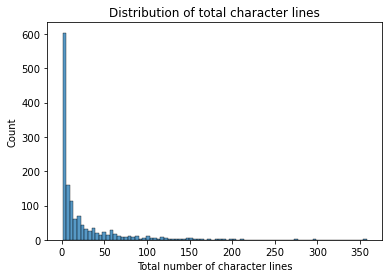

In [37]:
line_counts = {}
for index in line_df.index:
    play  = index[0]
    name = index[1]
    
    if (play, name) not in line_counts:
        line_counts[(play, name)] = line_df.loc[(play, name, colon), 'max_line_count'][0]

sns.histplot(line_counts)
plt.xlabel('Total number of character lines')
plt.title("Distribution of total character lines")
plt.show()

- Distribution of total character counts.

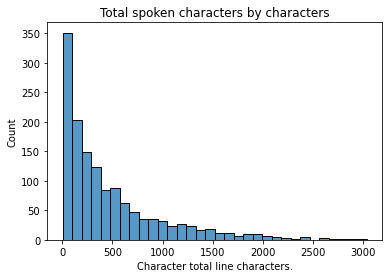

In [36]:
character_counts = {}
for index in line_df.index:
    play  = index[0]
    name = index[1]
    
    if (play, name) not in character_counts:
        character_counts[(play, name)] = line_df.loc[(play, name, colon), 'total_character_count'][0]

sns.histplot(character_counts)
plt.xlabel("Character total line characters.")
plt.title("Total spoken characters by characters")
plt.show()

- Characters with the most speaking lines.

In [21]:
temp = []
[temp.append(name) for name in line_df.sort_values(by = 'max_line_count').index.get_level_values(1) if name not in temp]
temp[-5:]

['CLEOPATRA', 'TIMON', 'OTHELLO', 'IAGO', 'HAMLET']

- Characters with the longest dialogue overall.

In [27]:
temp = []
[temp.append(name) for name in line_df.sort_values(by = 'total_character_count').index.get_level_values(1) if name not in temp]
temp[-5:]

['HAMLET', 'ULYSSES', 'EGEON', 'BISHOP OF CANTERBURY', 'PALAMON']

- Export data.

In [38]:
line_df.to_csv('../data/csv/ShakespeareCharacterLines_cleaned.csv', index_label = ['play', 'name', 'line_number'])

- On to Step 3 ->